In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import argparse as ap

from scipy.fftpack import fft
from scipy.fftpack import fftfreq
from scipy.signal import find_peaks as fpeaks

plt.rc('text', usetex=True)

In [2]:
def open_data(filename):
    csv_data = np.genfromtxt(filename, dtype=int, delimiter=',')
    return csv_data

In [3]:
def calc_densities(lattice):
    x_size, y_size = lattice.shape
    #x_size = lattice.shape[0]
    
    a_pop = np.count_nonzero(lattice == 0, axis=0)
    b_pop = np.count_nonzero(lattice == 1, axis=0)
    c_pop = np.count_nonzero(lattice == 2, axis=0)
    pop = a_pop + b_pop + c_pop
    
    densities = np.vstack((a_pop, b_pop, c_pop, pop))
    # TODO:
    # -sum up populations
    # - divide by x_size
    return densities / (x_size * 1.0)

In [4]:
def calc_corr_function(lattice, spec, r_min, r_max, sub_d_squared):
    x_size, y_size = lattice.shape
    r_size = r_max - r_min
    r_range = range(r_min, r_max)
    densities = calc_densities(lattice)
    
    corr = np.zeros((r_size, y_size))
    for r in r_range:
        corr_r = np.zeros(y_size)
        for i in range(x_size):
            target_index = i + r
            if (target_index > 0):
                target_index = target_index % x_size
            corr_xr = (lattice[i,:] == spec) & (lattice[target_index,:] == spec)
            corr_r = corr_r + corr_xr.astype(int)
        r_ind = r - r_min
        
        if (sub_d_squared):
            np.put(corr[r_ind,:], range(r_size), (corr_r / (1.0 * x_size)) - (densities[spec,:]*densities[spec,:]))
        else:
            np.put(corr[r_ind,:], range(r_size), corr_r/(1.0 * x_size))
    
    return corr, r_range, densities

In [5]:
os.getcwd()
#chdir("Research/Summer18Research/MonteCarloSim")

'/home/mlazarn/Research/Summer18Research/MonteCarloSim'

In [6]:
latt = open_data("data/dataRun_140420_0/rate_0/run_0/latt_5000.csv")

In [7]:
corr_0 = (latt[0,:] == 0) & (latt[-1,:] == 0)
corr_0.astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,

In [8]:
den = calc_densities(latt)

corr_a = np.zeros((511, y_size))
corr_a_subbed = np.zeros((511, y_size))
for r in range(-255, 256):
    corr_r = np.zeros(y_size)
    for i in range(x_size):
        target_index = i + r
        if (target_index > 0):
            target_index = target_index % x_size
        corr_xr = (latt[i,:] == 0) & (latt[target_index,:] == 0)
        corr_r = corr_r + corr_xr.astype(int)
    r_ind = r + 255
    np.put(corr_a[r_ind,:], range(512), corr_r/(1.0 * x_size))
    np.put(corr_a_subbed[r_ind,:], range(512), (corr_r / (1.0 * x_size)) - (den[0,:]*den[0,:]))

#a_pop = np.count_nonzero(latt == 0, axis=0)
#print((corr_a[0,:])

In [9]:
r = range(-255, 256)

fig1, ax1 = plt.subplots(facecolor="white")
ax1.plot(r, corr_a.T[32,:], label=r"y = 32")
ax1.plot(r, corr_a.T[64,:], label=r"y = 64")
ax1.plot(r, corr_a.T[256,:], label=r"y = 256")

ax1.axvline(20, linestyle='--', color='k')
#ax1.set_xlabel(r'$r$')
#ax1.set_ylabel(r'$C(r)$')

fig2, ax2 = plt.subplots(facecolor="white")
ax2.plot(r, corr_a_subbed.T[32,:], label=r"y = 32")
ax2.plot(r, corr_a_subbed.T[64,:], label=r"y = 64")
ax2.plot(r, corr_a_subbed.T[256,:], label=r"y = 256")

ax2.axvline(20, linestyle='--', color='k')
ax2.axhline(0, linestyle='--', color='k')
#ax1.set_xlabel(r'$r$')
#ax1.set_ylabel(r'$C(r)$')

corr_b, r, d = calc_corr_function(latt, 1, -255, 256, False)
corr_b_subbed  = calc_corr_function(latt, 1, -255, 256, True)[0]

corr_b.shape

fig3, ax3 = plt.subplots(facecolor="white")
ax3.plot(r, corr_b.T[32,:], label=r"y = 32")
ax3.plot(r, corr_b.T[64,:], label=r"y = 64")
ax3.plot(r, corr_b.T[256,:], label=r"y = 256")

ax3.axvline(20, linestyle='--', color='k')
ax3.set_xlabel(r'$r$')
ax3.set_ylabel(r'$C(r)$')

fig4, ax4 = plt.subplots(facecolor="white")
ax4.plot(r, corr_b_subbed.T[32,:], label=r"y = 32")
ax4.plot(r, corr_b_subbed.T[64,:], label=r"y = 64")
ax4.plot(r, corr_b_subbed.T[256,:], label=r"y = 256")

ax4.axvline(20, linestyle='--', color='k')
ax4.axhline(0, linestyle='--', color='k')
ax4.set_xlabel(r'$r$')
ax4.set_ylabel(r'$C(r)$')

In [15]:
min_r = -1
max_r = 300
corr_avg = np.zeros((max_r - min_r,512))
t_min = 5000
t_max = t_min + 32
r_range = np.zeros(max_r - min_r)

t_size = t_max - t_min
prefix = "data/dataRun_140420_0/rate_0/run_0/latt_"
spec = 0

sub_d_squared = True

corr_avg.shape

(301, 512)

In [16]:
for t in range(t_min, t_max):
    print(t)
    fname = prefix + str(t) + ".csv"
    latt0 = open_data(fname)
    
    #den0 = calc_densities(latt0)
    
    corr_t, r_range, densities = calc_corr_function(latt0, spec, min_r, max_r, sub_d_squared)
    print(corr_t.shape)
    #check = np.count_nonzero(corr_t.T[256,:] == corr_a_subbed[256,:])
    #corr_t = calc_corr_function(open_data(fname), den0, spec, r_min, r_max, sub_d_squared)[0]

    corr_avg = corr_avg + corr_t
    
corr_avg = corr_avg / (t_size * 1.0)
print(corr_avg.shape)

5000
(301, 512)
5001
(301, 512)
5002
(301, 512)
5003
(301, 512)
5004
(301, 512)
5005
(301, 512)
5006
(301, 512)
5007
(301, 512)
5008
(301, 512)
5009
(301, 512)
5010
(301, 512)
5011
(301, 512)
5012
(301, 512)
5013
(301, 512)
5014
(301, 512)
5015
(301, 512)
5016
(301, 512)
5017
(301, 512)
5018
(301, 512)
5019
(301, 512)
5020
(301, 512)
5021
(301, 512)
5022
(301, 512)
5023
(301, 512)
5024
(301, 512)
5025
(301, 512)
5026
(301, 512)
5027
(301, 512)
5028
(301, 512)
5029
(301, 512)
5030
(301, 512)
5031
(301, 512)
(301, 512)


Text(0, 0.5, '$C(r)$')

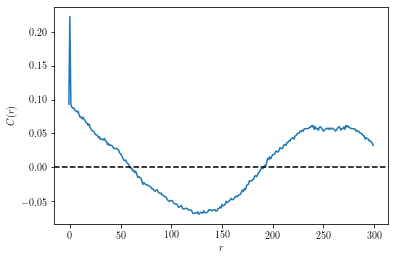

In [20]:
r = r_range
fig5, ax5 = plt.subplots(facecolor="white")
ax5.plot(r[:], corr_avg.T[80,:], label=r"y = 256")
#ax5.plot(r[:], corr_avg.T[32,:], label=r"y = 32")
#ax5.plot(r[:], corr_avg.T[64,:], label=r"y = 64")


#ax5.axvline(20, linestyle='--', color='k')
ax5.axhline(0, linestyle='--', color='k')
ax5.set_xlabel(r'$r$')
ax5.set_ylabel(r'$C(r)$')

In [ ]:
print(r[25])

fig6, ax6 = plt.subplots(facecolor="white")
#ax6.plot(r, corr_b_subbed.T[256,:], label=r"y = 256")
#ax6.plot(r, corr_avg.T[256,:], label=r"y = 256")
ax6.plot(r, corr_diff.T[256,:], label=r"y = 256")

ax6.axhline(0, linestyle='--', color='k')


In [ ]:
corr_a0, r_range, d  = calc_corr_function(open_data(prefix + "5000.csv"), 0, -255, 256, True)
corr_a1  = calc_corr_function(open_data(prefix + "6000.csv"), 0, -255, 256, True)[0]
diff = np.abs(corr_a0 - corr_a1)

In [ ]:
fig7, ax7 = plt.subplots(facecolor="white")
#ax6.plot(r, corr_b_subbed.T[256,:], label=r"y = 256")
#ax6.plot(r, corr_avg.T[256,:], label=r"y = 256")
ax7.plot(r_range, diff.T[256,:], label=r"y = 256")
print(np.max(diff))
ax7.axhline(0, linestyle='--', color='k')